In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Load the data
data = pd.read_csv('Rice Tamilnadu.csv')

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Check data types
print("\nData types:\n", data.dtypes)

# Summary statistics
print("\nSummary statistics:\n", data.describe())

# Check for duplicates
print("\nNumber of duplicates:", data.duplicated().sum())

Missing values:
 Dist Code                      0
Year                           0
State Code                     0
State Name                     0
Dist Name                      0
RICE AREA (1000 ha)            0
RICE PRODUCTION (1000 tons)    0
RICE YIELD (Kg per ha)         0
Precipitation                  0
Temperature                    0
Wind Speed                     0
dtype: int64

Data types:
 Dist Code                        int64
Year                             int64
State Code                       int64
State Name                      object
Dist Name                       object
RICE AREA (1000 ha)            float64
RICE PRODUCTION (1000 tons)    float64
RICE YIELD (Kg per ha)           int64
Precipitation                  float64
Temperature                    float64
Wind Speed                     float64
dtype: object

Summary statistics:
         Dist Code         Year  State Code  RICE AREA (1000 ha)  \
count  280.000000   280.000000       280.0           280.0000

Actual column names in dataset:
['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name', 'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)', 'RICE YIELD (Kg per ha)', 'Precipitation ', 'Temperature', 'Wind Speed']


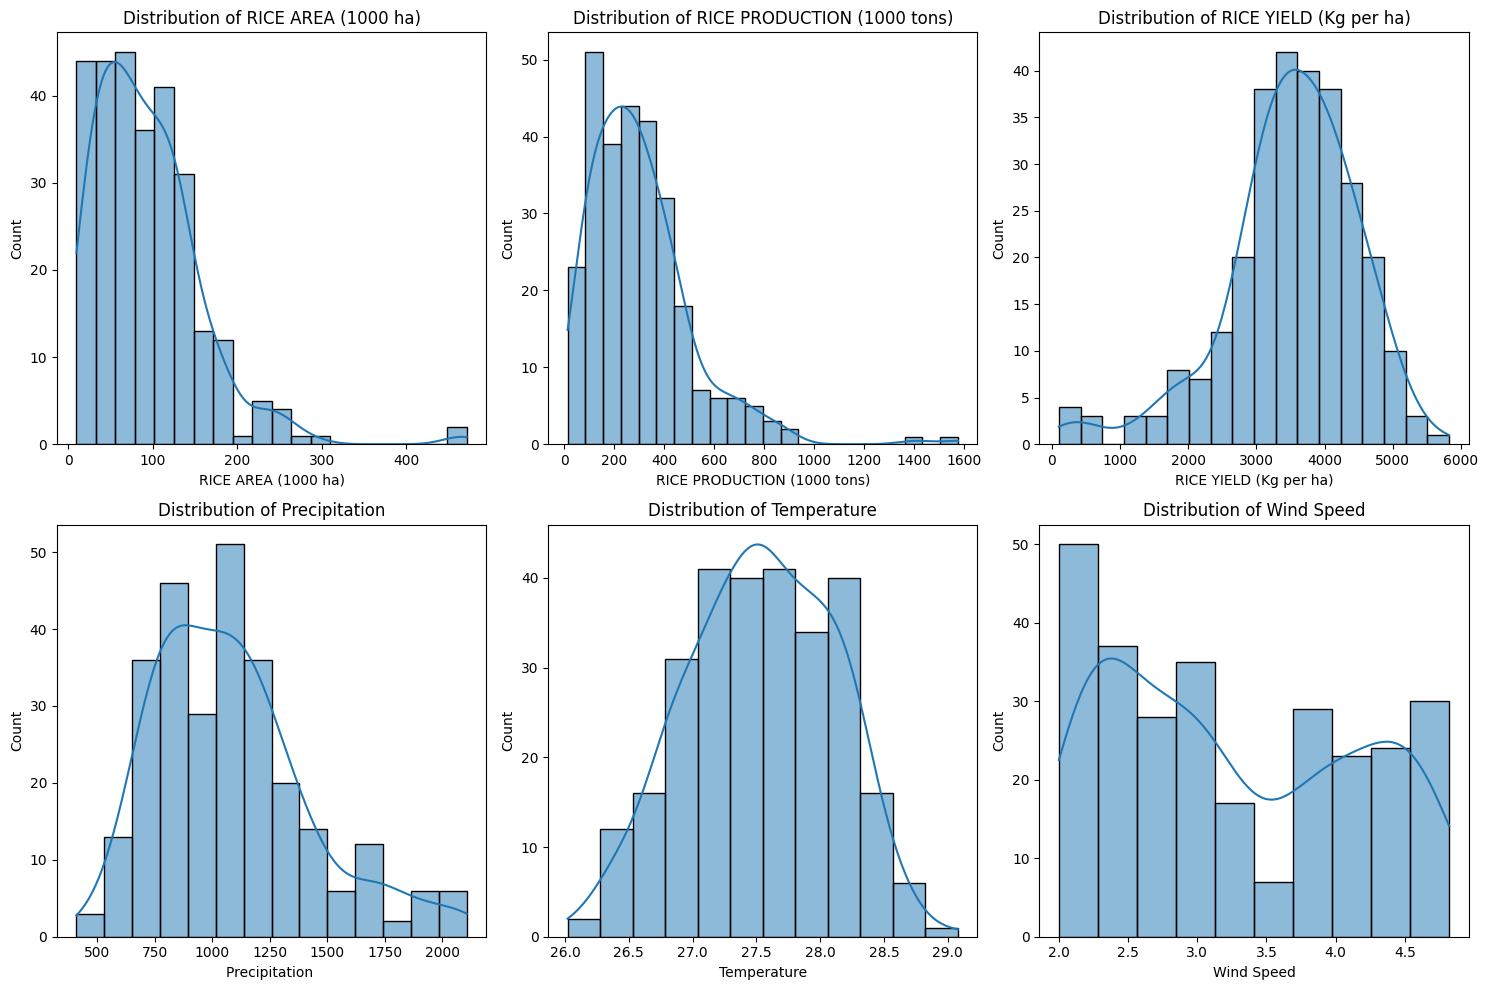

In [3]:
# First, let's check the exact column names in the dataset
print("Actual column names in dataset:")
print(data.columns.tolist())

# Now use the correct column names (note the space after Precipitation)
plt.figure(figsize=(15, 10))
cols = ['RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)', 'RICE YIELD (Kg per ha)', 
        'Precipitation ', 'Temperature', 'Wind Speed']  # Note the space after Precipitation
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col.strip()}')  # strip() removes any extra spaces
plt.tight_layout()
plt.show()

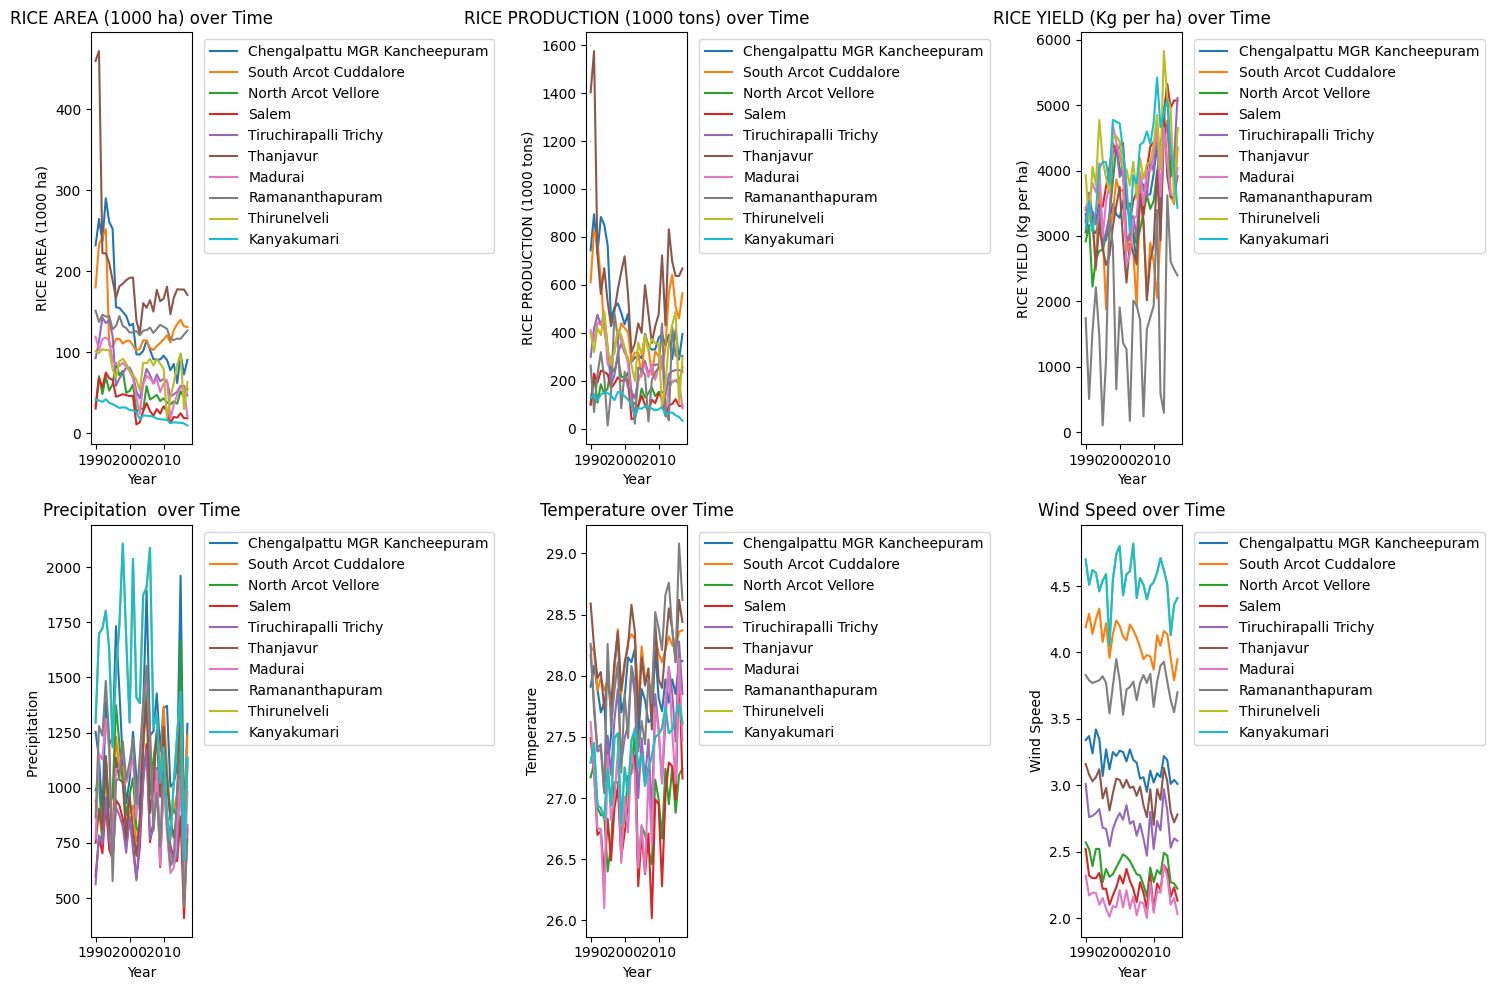

In [4]:
# Plot trends over time
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(data=data, x='Year', y=col, hue='Dist Name')
    plt.title(f'{col} over Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

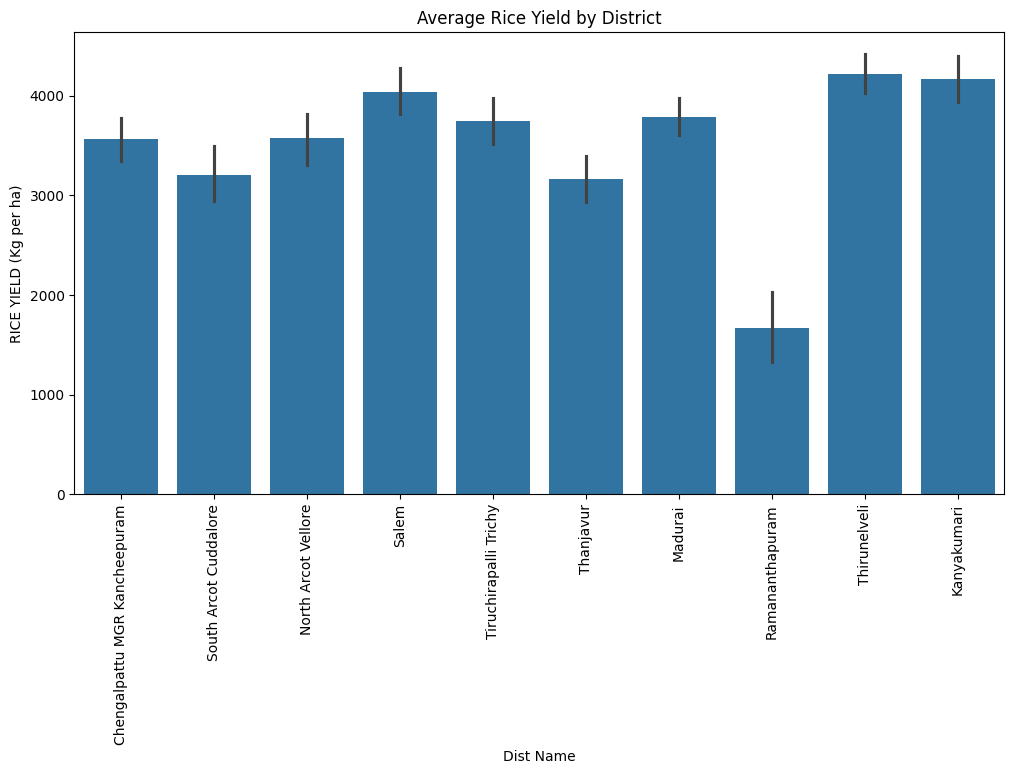

In [5]:
# District-wise average yield
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Dist Name', y='RICE YIELD (Kg per ha)')
plt.xticks(rotation=90)
plt.title('Average Rice Yield by District')
plt.show()

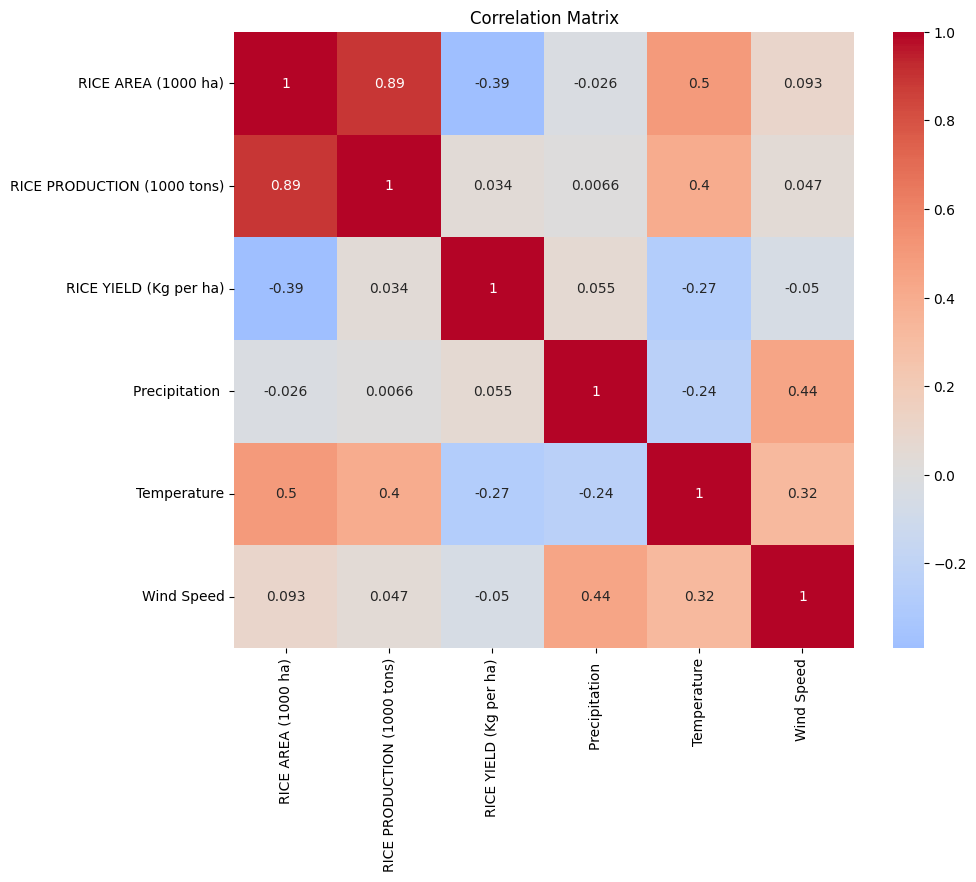

In [6]:
# Correlation matrix
corr_matrix = data[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

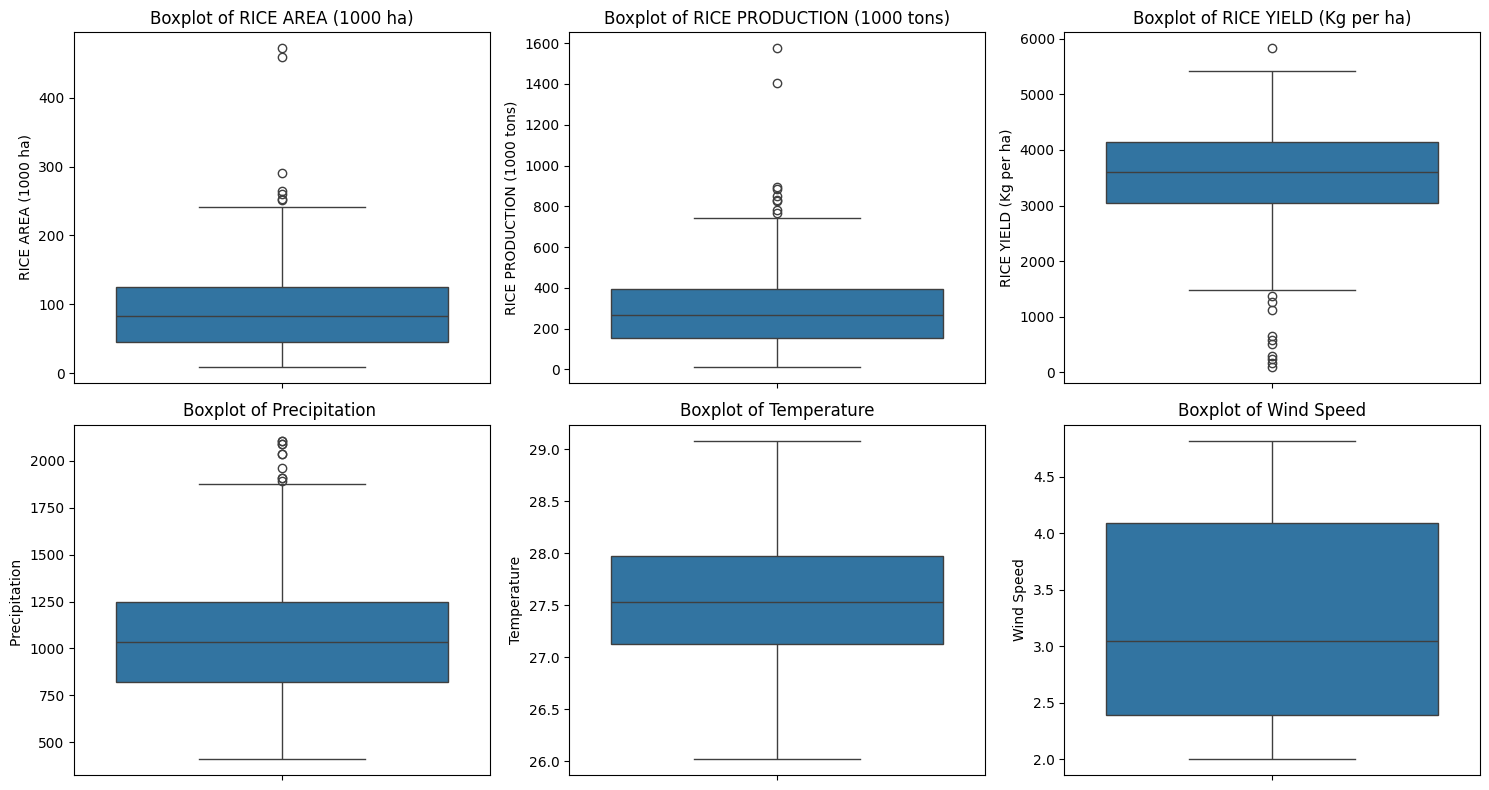


Outliers in RICE AREA (1000 ha): 7
                         Dist Name  Year  RICE AREA (1000 ha)
1    Chengalpattu MGR Kancheepuram  1991               264.41
3    Chengalpattu MGR Kancheepuram  1993               290.00
4    Chengalpattu MGR Kancheepuram  1994               260.71
5    Chengalpattu MGR Kancheepuram  1995               252.33
31           South Arcot Cuddalore  1993               252.00
140                      Thanjavur  1990               459.42
141                      Thanjavur  1991               471.62

Outliers in RICE PRODUCTION (1000 tons): 9
                         Dist Name  Year  RICE PRODUCTION (1000 tons)
1    Chengalpattu MGR Kancheepuram  1991                       894.59
3    Chengalpattu MGR Kancheepuram  1993                       883.00
4    Chengalpattu MGR Kancheepuram  1994                       850.76
5    Chengalpattu MGR Kancheepuram  1995                       765.19
29           South Arcot Cuddalore  1991                       827.59
30  

In [7]:
# Boxplots to identify outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Identify extreme outliers using IQR method
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

for col in cols:
    outliers = detect_outliers(data, col)
    print(f"\nOutliers in {col}: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers[['Dist Name', 'Year', col]])

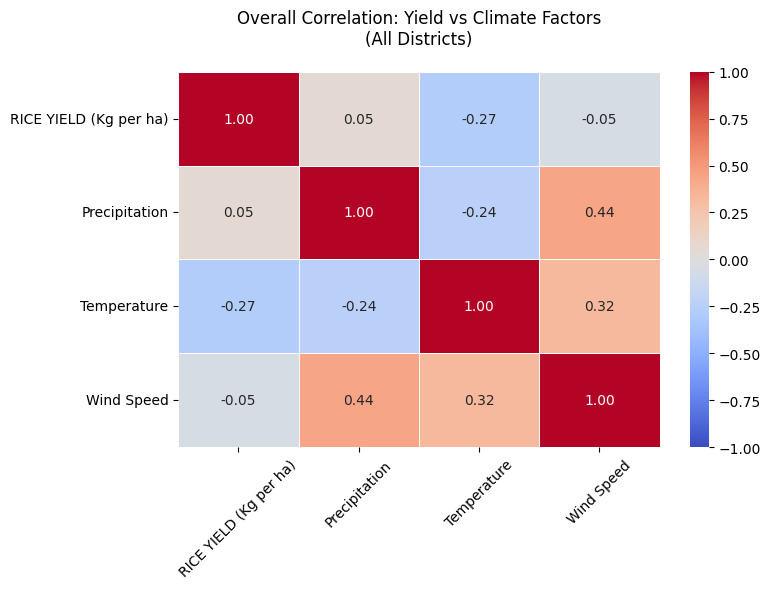

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean column names (remove extra spaces)
data.columns = data.columns.str.strip()

# Select relevant columns
cols = ['RICE YIELD (Kg per ha)', 'Precipitation', 'Temperature', 'Wind Speed']

# Calculate correlation matrix
corr_matrix = data[cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, vmax=1, 
            center=0,
            fmt=".2f",
            linewidths=0.5)
plt.title('Overall Correlation: Yield vs Climate Factors\n(All Districts)', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

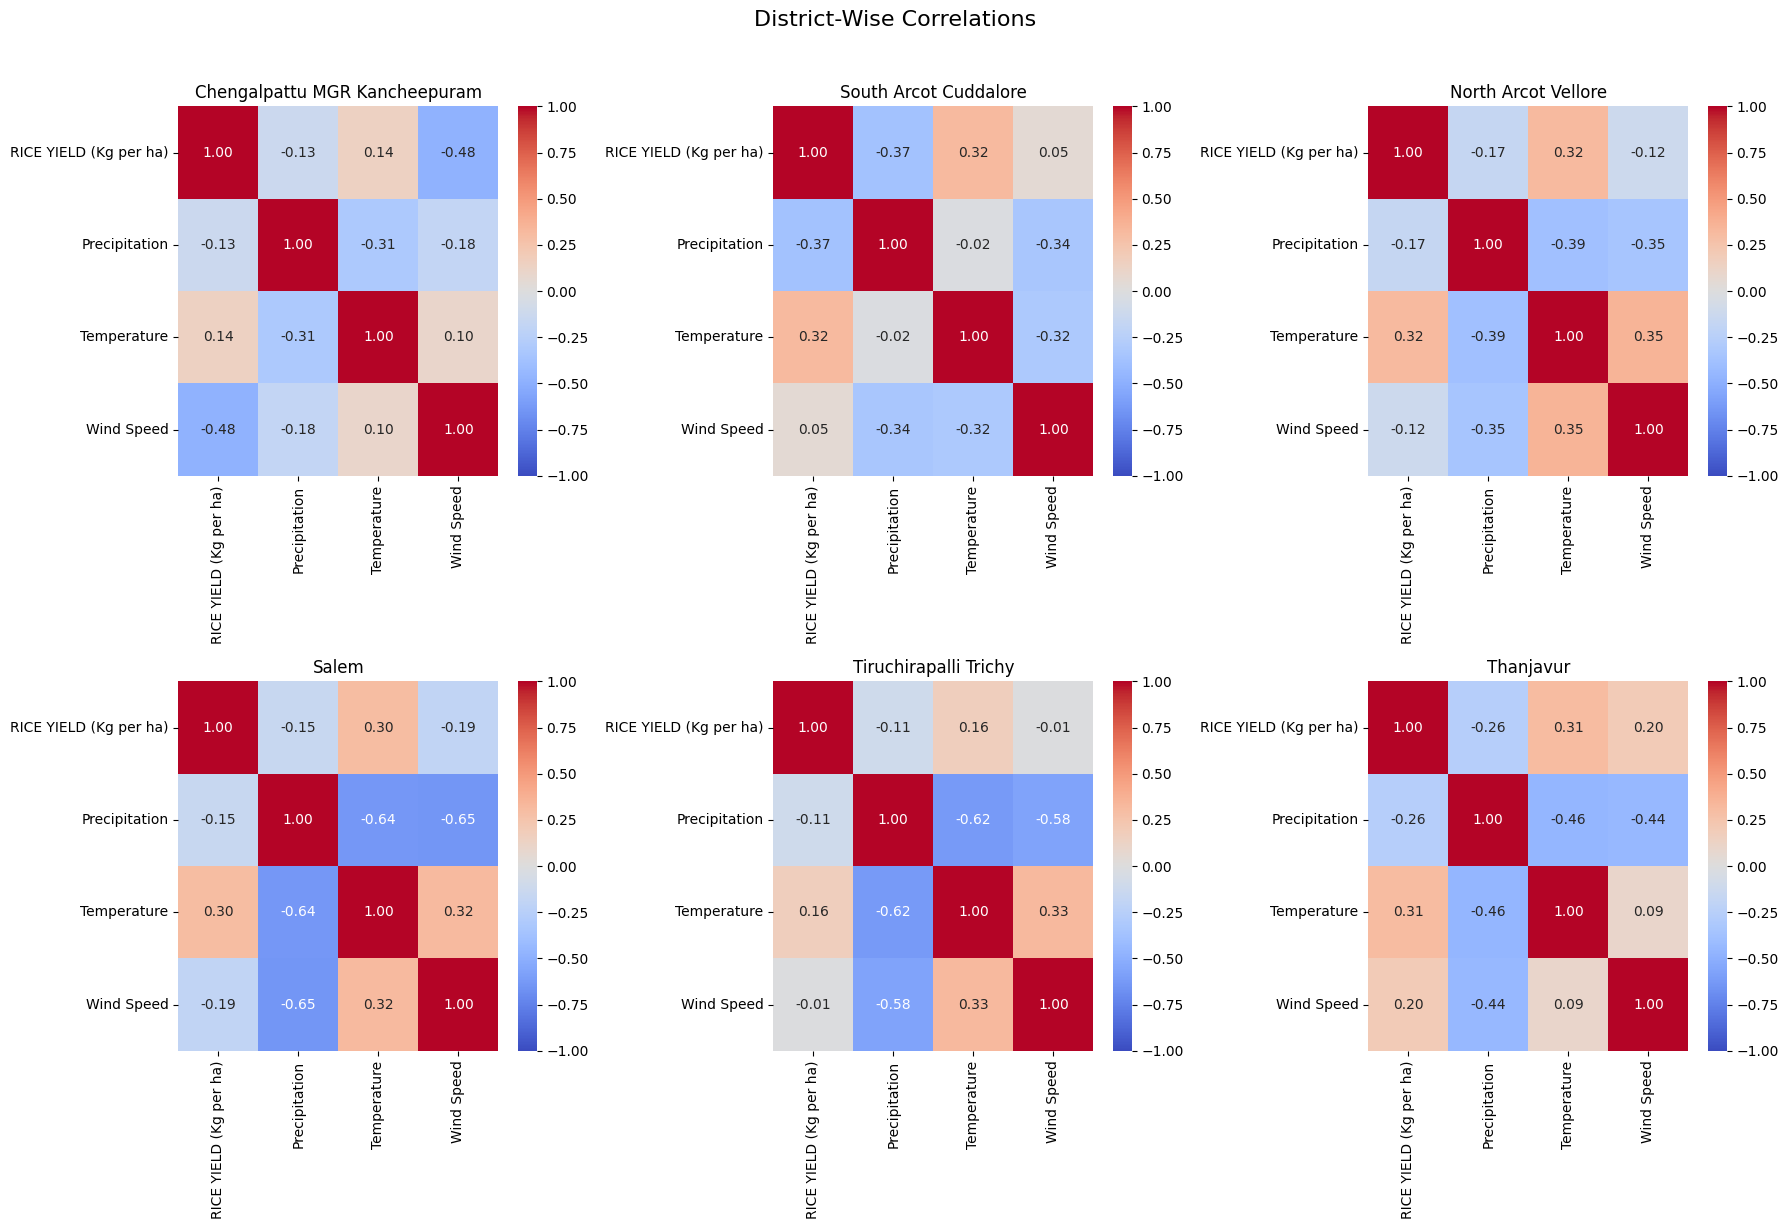

In [9]:
# Get top 6 districts by data points
top_districts = data['Dist Name'].value_counts().index[:6]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('District-Wise Correlations', y=1.02, fontsize=16)

for dist, ax in zip(top_districts, axes.flatten()):
    dist_data = data[data['Dist Name'] == dist]
    corr = dist_data[cols].corr()
    sns.heatmap(corr, 
                annot=True, 
                cmap='coolwarm', 
                ax=ax,
                vmin=-1, vmax=1,
                fmt=".2f")
    ax.set_title(dist)
plt.tight_layout()
plt.show()

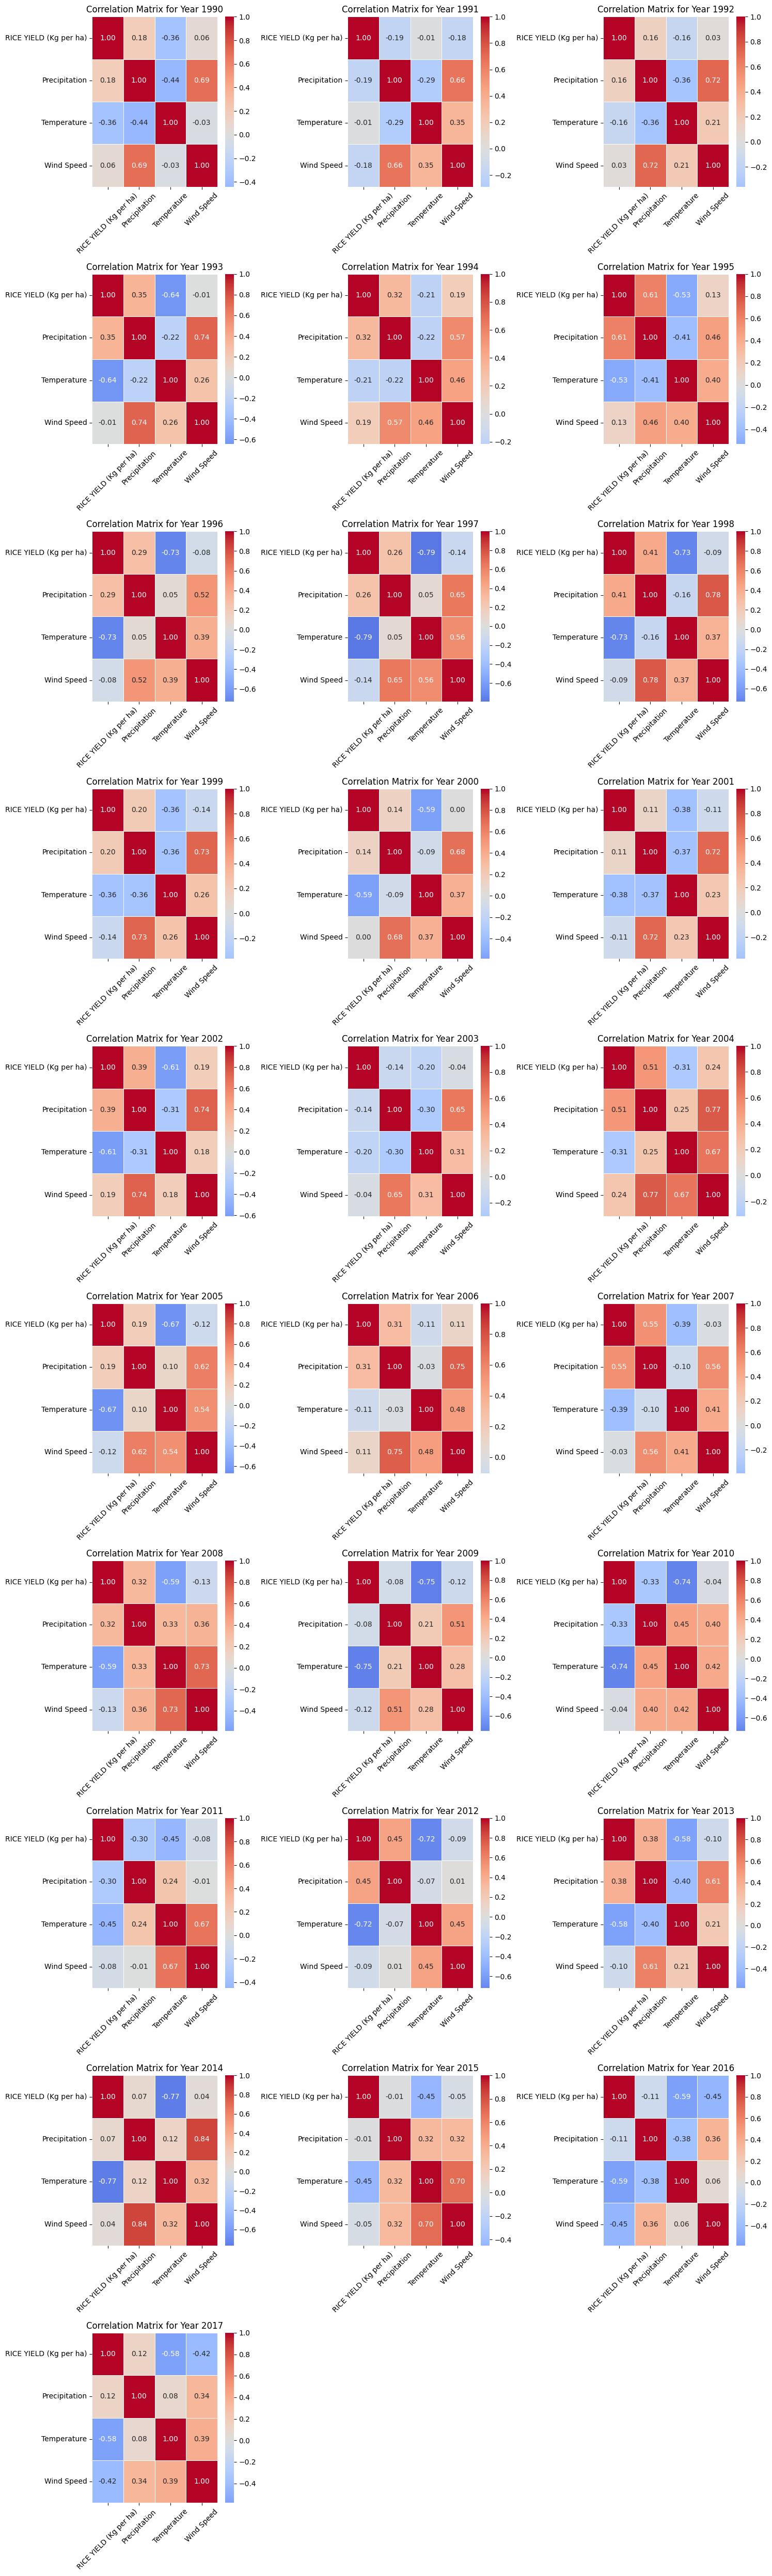

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace with the actual file path)
data = pd.read_csv('Rice Tamilnadu.csv')

# Clean column names (remove extra spaces)
data.columns = data.columns.str.strip()

# Select relevant columns
cols = ['RICE YIELD (Kg per ha)', 'Precipitation', 'Temperature', 'Wind Speed']

# Calculate the number of subplots needed (one for each unique year)
unique_years = data['Year'].unique()
num_years = len(unique_years)

# Calculate number of rows and columns for subplots
n_cols = 3
n_rows = (num_years // n_cols) + (num_years % n_cols > 0)

# Create a figure to plot multiple correlation matrices
plt.figure(figsize=(15, 5 * n_rows))  # Adjust figure size based on the number of rows

# Iterate over unique years in the dataset
for i, year in enumerate(unique_years, 1):
    year_data = data[data['Year'] == year]  # Filter data for each year
    corr_matrix = year_data[cols].corr()  # Calculate correlation matrix for that year
    
    # Dynamically calculate subplot position
    plt.subplot(n_rows, n_cols, i)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Matrix for Year {year}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
